<a href="https://colab.research.google.com/github/LEESOOJAE1978/sjcu/blob/main/lecture08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. 구글 드라이브 연결하기

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/My Drive/sjcu

/content/drive/My Drive/sjcu


1. 패키지 불러오기

In [74]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline

2. 데이터 탐색하기

In [75]:
train = pd.read_csv('bike-sharing-demand/train.csv')
test = pd.read_csv('bike-sharing-demand/test.csv')
submission = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')

In [11]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [14]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


3. 주요함수 - lambda, map


In [51]:
def hap(x,y):
  return x+y

hap(10,20)

30

In [54]:
(lambda x,y: x + y)(10,20)

30

In [ ]:
myList = [1,2,3,4,5]

result = []
for val in myList:
  result.append(val + 1)

print(f'result : {result}')

In [ ]:
def add_one(x):
  return x+1

result1 = list(map(add_one, myList))
print(f'result1 : {result1}')

In [ ]:
list(map(lambda x:x+1, range(5)))

3. 피처 엔지니어링(Feature Engineering)

In [21]:
print(train['datetime'][100])#datetime 100번째 원소 불러오기
print(train['datetime'][100].split()) #공백기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) #날짜 
print(train['datetime'][100].split()[1]) #시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [25]:
print(train['datetime'][100].split()[0].split('-')) #날짜를 '-'기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split('-')[0]) #연도 
print(train['datetime'][100].split()[0].split('-')[1]) #월 
print(train['datetime'][100].split()[0].split('-')[2]) #일


['2011', '01', '05']
2011
01
05


In [27]:
print(train['datetime'][100].split()[1].split(':')) #시간을 ':'기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(':')[0])#시간
print(train['datetime'][100].split()[1].split(':')[1])#분
print(train['datetime'][100].split()[1].split(':')[2])#초


['09', '00', '00']
09
00
00


3.1. 람다함수 활용해서 날짜, 시간 피처 생성

In [76]:
train['date'] = train['datetime'].apply(lambda x:x.split()[0]) #날짜 피처 생성
train['date']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
10881    2012-12-19
10882    2012-12-19
10883    2012-12-19
10884    2012-12-19
10885    2012-12-19
Name: date, Length: 10886, dtype: object

In [77]:
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [78]:
train['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: object

3.2. 요일과 계절 피처 생성

In [79]:
from datetime import datetime
import calendar

In [80]:
print(train['date'][200])
print(datetime.strptime(train['date'][200], '%Y-%m-%d')) #datetime 타입으로 변경
print(datetime.strptime(train['date'][200], '%Y-%m-%d').weekday()) #정수로 요일 변경
print(calendar.day_name[datetime.strptime(train['date'][200], '%Y-%m-%d').weekday()])

2011-01-09
2011-01-09 00:00:00
6
Sunday


In [81]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
train['weekday']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: weekday, Length: 10886, dtype: object

3.3 map 함수 활용하여 계절과 날씨 피처링

In [82]:
train['season'].head()

0    1
1    1
2    1
3    1
4    1
Name: season, dtype: int64

In [83]:
train['weather'].head()

0    1
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

In [84]:
train['season'] = train['season'].map({1: 'Spring',
                                       2: 'Summer',
                                       3: 'Fall',
                                       4: 'Winter'})

train['weather'] = train['weather'].map({1:'clear',
                                         2:'mist, few clouds',
                                         3:'Light Snow, Rain, Thunderstorm',
                                         4:'Heavy Rain, Tunderstorm, Snow, Fog'})

In [85]:
train['season'].head()

0    Spring
1    Spring
2    Spring
3    Spring
4    Spring
Name: season, dtype: object

In [42]:
train['weather'].head()

0    clear
1    clear
2    clear
3    clear
4    clear
Name: weather, dtype: object

In [43]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


4. 데이터 시각화

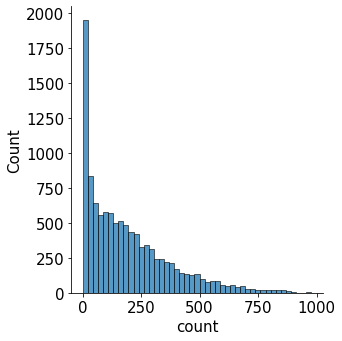

In [86]:
plt.rc('font', size = 15)
sns.displot(train['count'])
plt.show()

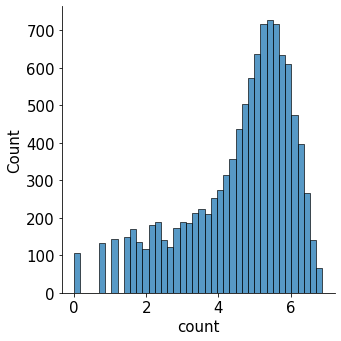

In [87]:
sns.displot(np.log(train['count']))
plt.show()

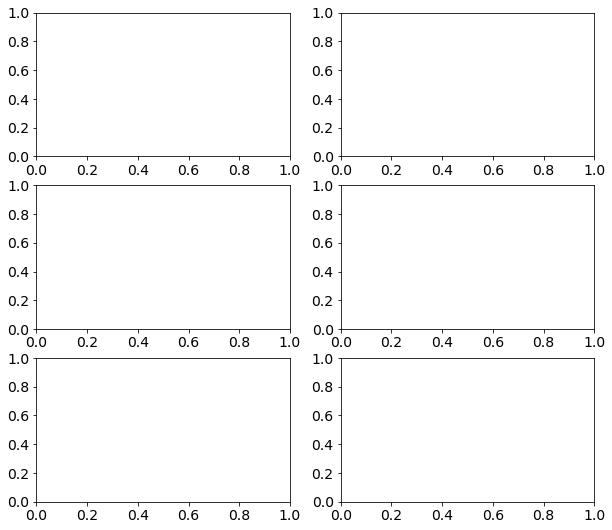

In [88]:
plt.rc('font', size = 14) #폰트 크기 설정
plt.rc('axes', titlesize = 15)# 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열 figure 생성
plt.tight_layout #그래프 사이의 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10X9인치로 설정

In [63]:
sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0,0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0,1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1,0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1,1])
sns.barplot(x = 'minute', y = 'count', data = train, ax = axes[2,0])
sns.barplot(x= 'second', y = 'count', data = train, ax = axes[2,1])

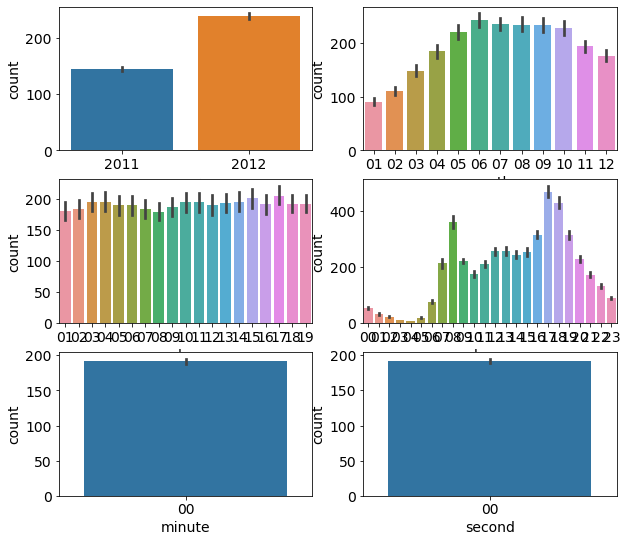

In [89]:
plt.rc('font', size = 14) #폰트 크기 설정
plt.rc('axes', titlesize = 15)# 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) #3행 2열 figure 생성
plt.tight_layout #그래프 사이의 여백 확보
figure.set_size_inches(10,9) #전체 Figure 크기를 10X9인치로 설정
sns.barplot(x = 'year', y = 'count', data = train, ax = axes[0,0])
sns.barplot(x = 'month', y = 'count', data = train, ax = axes[0,1])
sns.barplot(x = 'day', y = 'count', data = train, ax = axes[1,0])
sns.barplot(x = 'hour', y = 'count', data = train, ax = axes[1,1])
sns.barplot(x = 'minute', y = 'count', data = train, ax = axes[2,0])
sns.barplot(x= 'second', y = 'count', data = train, ax = axes[2,1])

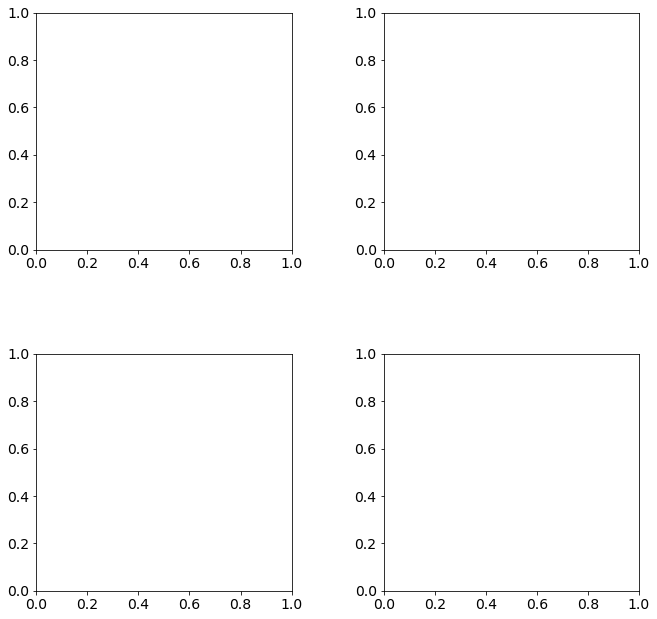

In [90]:
figure, axes = plt.subplots(nrows = 2,ncols =2) #2행 2열
plt.tight_layout() #그래프 여백 확보
figure.set_size_inches(10,10) #전체 Figure 크기를 10X10으로

In [91]:
sns.boxplot(x='season', y = 'count', data = train, ax = axes[0,0])
sns.boxplot(x='weather', y ='count', data= train, ax = axes[0,1])
sns.boxplot(x='holiday', y = 'count', data = train, ax = axes[1,0])
sns.boxplot(x='workingday', y = 'count', data = train, ax = axes[1,1])


In [92]:
axes[0,0].set(title = 'Box Plot on Count Across Season')
axes[0,1].set(title = 'Box Plot on Count Across Weather')
axes[1,0].set(title = 'Box Plot on Count Across Holiday')
axes[1,1].set(title = 'Box Plot on Count Across Working Day')

axes[0,1].tick_params(axis = 'x', labelrotation = 10) # x축 라벨 겹침 해결

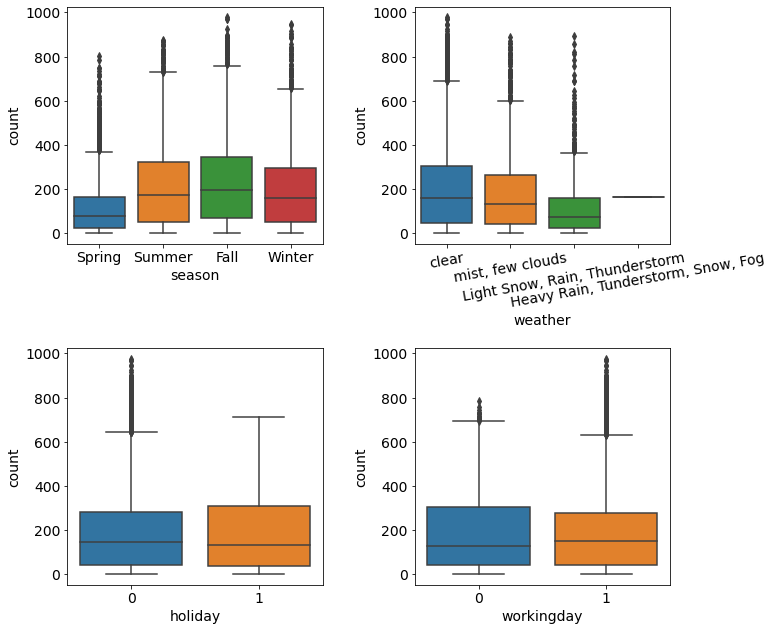

In [93]:
figure, axes = plt.subplots(nrows = 2,ncols =2) #2행 2열
plt.tight_layout() #그래프 여백 확보
figure.set_size_inches(10,10) #전체 Figure 크기를 10X10으로
sns.boxplot(x='season', y = 'count', data = train, ax = axes[0,0])
sns.boxplot(x='weather', y ='count', data= train, ax = axes[0,1])
sns.boxplot(x='holiday', y = 'count', data = train, ax = axes[1,0])
sns.boxplot(x='workingday', y = 'count', data = train, ax = axes[1,1])

axes[0,1].tick_params(axis = 'x', labelrotation = 10)


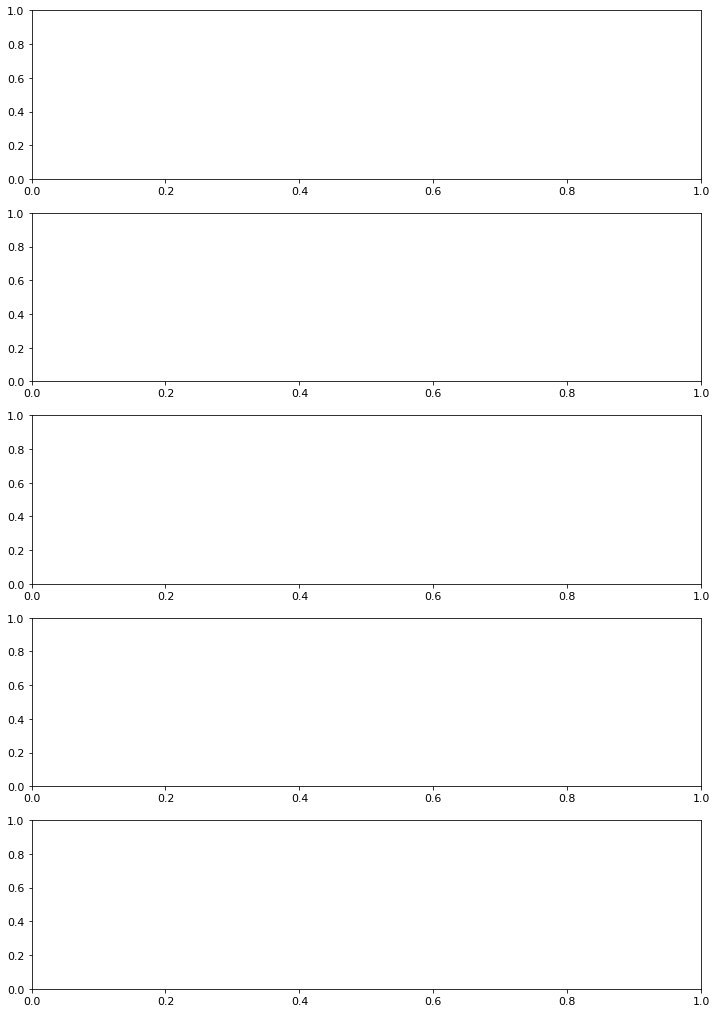

In [94]:
plt.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12,18)

In [95]:
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

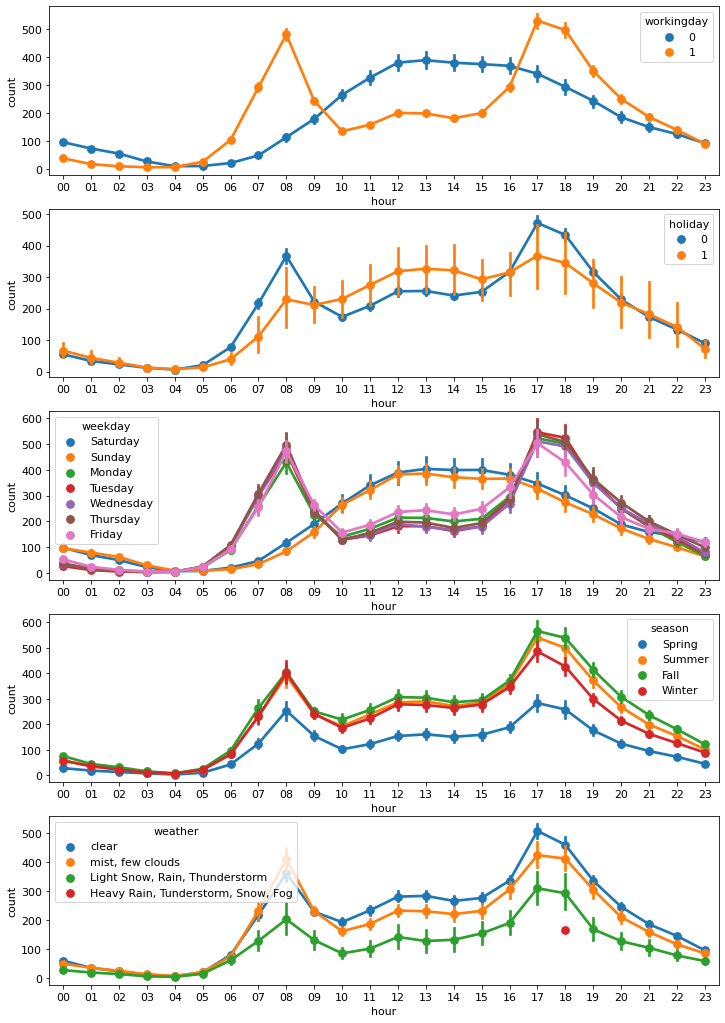

In [96]:
plt.rc('font', size = 11)
figure, axes = plt.subplots(nrows = 5)
figure.set_size_inches(12,18)

sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'workingday', ax = axes[0])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'holiday', ax = axes[1])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weekday', ax = axes[2])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'season', ax = axes[3])
sns.pointplot(x = 'hour', y = 'count', data = train, hue = 'weather', ax = axes[4])

5. 모델 생성

In [98]:
train = pd.read_csv('bike-sharing-demand/train.csv')
test = pd.read_csv('bike-sharing-demand/test.csv')
submission = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')

In [101]:
train = train[train['weather'] !=4]

all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [103]:
all_data['date'] = all_data['datetime'].apply(lambda x:x.split()[0]) #날짜 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0]) # 연도 피처
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1]) #월 피처
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0]) #시간 피처
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, "%Y-%m-%d").weekday()) #요일 피처

In [104]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']
all_data = all_data.drop(drop_features, axis = 1)

In [105]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

In [116]:
X_train = X_train.drop(['count'], axis = 1)
X_test = X_test.drop(['count'], axis = 1)
y = train['count']


In [132]:
import numpy as np
def rmsle(y_true, y_pred, convertExp=True):
  #지수변환
  if convertExp:
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)

    #로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
  return output

In [135]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
log_y = np.log(y) #타깃값 로그 변환
linear_reg_model.fit(X_train, log_y) #모델 훈련


LinearRegression()

In [136]:
preds = linear_reg_model.predict(X_train)

In [137]:
print(f'선형 회귀의 RMSLE의 값: {rmsle(log_y, preds, True): 4f}')

선형 회귀의 RMSLE의 값:  1.020498


In [145]:
linearreg_preds = linear_reg_model.predict(X_test)
submission['count'] = np.exp(linearreg_preds)
submission.to_csv('submission.csv', index=False)

In [141]:
submission

,datetime,count
0,2011-01-20 00:00:00,11.362398
1,2011-01-20 01:00:00,13.601789
2,2011-01-20 02:00:00,15.084417
3,2011-01-20 03:00:00,16.308758
4,2011-01-20 04:00:00,18.086453
...,...,...
6488,2012-12-31 19:00:00,114.076538
6489,2012-12-31 20:00:00,126.511160
6490,2012-12-31 21:00:00,140.114463
6491,2012-12-31 22:00:00,169.345347
